                                                         PREDICTING IPL MATCHES OUTCOMES                                                                           

Objective:To find the win Probablity of the second batting team depending on the match conditon like over bowled,wicket gone ,venue  and runs scored by first batting team.

The model contain the two datasets named "matches.csv" "url:https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set?select=matches.csv" and "deliveries.csv" "url:https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set?select=deliveries.csv"and found on Kaagle. All the analysis is done on the basis on avaiable data.

The "matches.csv" contain the columns like Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,wins by runs, wins by wickets,player of match,venue,umpire1, umpire2 and umpire3.


The "deliveries.csv" contain the columns like batting team,bowling team,run scored,extra run,no ballrun,over,legbye run etc.

In [528]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASETS


In [529]:
match=pd.read_csv("matches.csv")
delivery=pd.read_csv("deliveries.csv")
match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [530]:
match.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [531]:
match.shape

(756, 18)

In [532]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [533]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


                                                                 Data Cleaning and Data Wrangling                                                                     

In [534]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [535]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

                                                                     DATA CLEANING                                                                                          

In [536]:
# Check if the columns exist before attempting to drop them
columns_to_drop = ['umpire1', 'umpire2', 'umpire3', 'player_of_match']
existing_columns_to_drop = [col for col in columns_to_drop if col in match.columns]

if existing_columns_to_drop:
	match = match.drop(columns=existing_columns_to_drop)

# Display the first few rows to confirm the columns are removed
match.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium


In [537]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [538]:
total_score_df=total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [539]:
match.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'venue'],
      dtype='object')

In [540]:
match['team1'] = match['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['team2'] = match['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['winner'] = match['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals') 
match['toss_winner'] = match['toss_winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match['team1'] = match['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['team2'] = match['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['winner'] = match['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad') 
match['toss_winner'] = match['toss_winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [541]:
match['winner'] = match['winner'].fillna('Draw')

In [542]:
match['winner'].isnull().sum()

np.int64(0)

In [543]:
teams = {
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kings XI Punjab',
    'Kolkata Knight Riders',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
}


In [544]:
match= match[match['team1'].isin(teams)]
match= match[match['team2'].isin(teams)]
match.columns


Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'venue'],
      dtype='object')

In [545]:
match.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Wankhede Stadium
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,M. A. Chidambaram Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,ACA-VDCA Stadium
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,Rajiv Gandhi Intl. Cricket Stadium


In [546]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",1,207
1,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium,5,157
2,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium,7,178
3,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,Holkar Cricket Stadium,8,148
4,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Wankhede Stadium,11347,143
637,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,M. A. Chidambaram Stadium,11412,136
638,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,ACA-VDCA Stadium,11413,171
639,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,ACA-VDCA Stadium,11414,155


In [547]:

match_df['team1'].unique()

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df= match_df[match_df['team1'].isin(teams)]
match_df= match_df[match_df['team2'].isin(teams)]

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal",1,207
1,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,M Chinnaswamy Stadium,5,157
2,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium,7,178
3,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,Holkar Cricket Stadium,8,148
4,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,Wankhede Stadium,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,Wankhede Stadium,11347,143
637,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,M. A. Chidambaram Stadium,11412,136
638,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,ACA-VDCA Stadium,11413,171
639,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,ACA-VDCA Stadium,11414,155


In [548]:
match_df.shape

(641, 16)

In [549]:
match_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'venue', 'match_id', 'total_runs'],
      dtype='object')

In [550]:
match_df=match_df[match_df['dl_applied']== 0]

In [551]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [552]:
delivery_df=match_df.merge(delivery,on='match_id')

In [553]:
delivery_df=delivery_df[delivery_df['inning'] == 2]

In [554]:
# Ensure the column 'total_runs_y' is of numeric type
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Apply cumsum after converting to numeric type
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

delivery_df['runs_left']= delivery_df['total_runs_x'] - delivery_df['current_score']


delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [555]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

# Ensure the column 'player_dismissed' is of numeric type
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'], errors='coerce')

wickets = delivery_df.groupby("match_id")['player_dismissed'].cumsum().values
delivery_df['wickets']= 10- wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,10


In [556]:

delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,wickets,balls_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,10,119,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,10,118,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,10,117,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,10,116,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,10,115,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,5,4,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,5,3,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,4,2,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,4,1,7.915966,-30.000000


In [557]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0



delivery_df['result']= delivery_df.apply(result,axis=1)



final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [558]:
final_df=final_df.sample(final_df.shape[0])

final_df.sample(1)

final_df.dropna(inplace=True)

final_df=final_df[final_df['balls_left'] !=0]



                                                       Exploratory data analysis (EDA)                                                                     

1.Target Variable Analysis (winner).
  - Calculate the each teams win rates and find the most dominating team.

In [559]:
# Calculate total matches played by each team
teams = pd.concat([match['team1'], match['team2']]).unique()
total_matches = {team: match[(match['team1'] == team) | (match['team2'] == team)].shape[0] for team in teams}

# Calculate total wins for each team
total_wins = {team: match[match['winner'] == team].shape[0] for team in teams}

# Calculate win rate for each team
win_rate = {team: (total_wins[team] / total_matches[team]) * 100 for team in teams}

# Display the win rate for each team
for team in win_rate:
    print(f"{team}: {win_rate[team]:.2f}%")

Sunrisers Hyderabad: 44.91%
Royal Challengers Bangalore: 43.90%
Kolkata Knight Riders: 51.53%
Kings XI Punjab: 45.96%
Delhi Capitals: 42.24%
Mumbai Indians: 58.82%
Chennai Super Kings: 60.90%
Rajasthan Royals: 50.00%


C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\28562440.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Win Rate', y='Team', data=win_rate_df, palette='viridis')


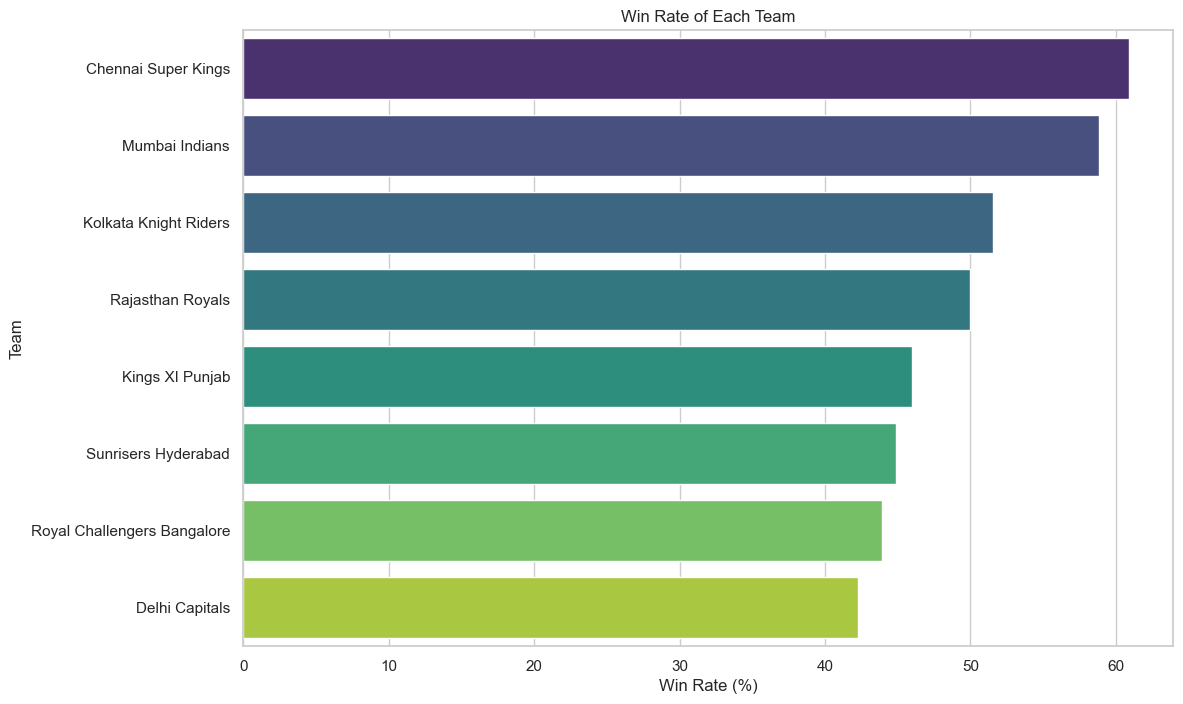

In [560]:

# Calculate total matches played by each team
teams = pd.concat([match['team1'], match['team2']]).unique()
total_matches = {team: match[(match['team1'] == team) | (match['team2'] == team)].shape[0] for team in teams}

# Calculate total wins for each team
total_wins = {team: match[match['winner'] == team].shape[0] for team in teams}

# Calculate win rate for each team
win_rate = {team: (total_wins[team] / total_matches[team]) * 100 for team in teams}

# Convert the win rate dictionary to a DataFrame for visualization
win_rate_df = pd.DataFrame(list(win_rate.items()), columns=['Team', 'Win Rate'])

# Sort the DataFrame by win rate
win_rate_df = win_rate_df.sort_values(by='Win Rate', ascending=False)

# Plot the win rate
plt.figure(figsize=(12, 8))
sns.barplot(x='Win Rate', y='Team', data=win_rate_df, palette='viridis')
plt.title('Win Rate of Each Team')
plt.xlabel('Win Rate (%)')
plt.ylabel('Team')
plt.show()

From the plot, we can visualize that the most dominating team in IPL from Season 2008-2019 is Chennai Super Kings followed by Mumbai Indians and least dominating team is Delhi Capitals followed by Royal Challengers Bangalore.

2.Match and Team Pairing Analysis
 -  Head to Head analysis between each teams and pair of two teams.

In [561]:


# Ensure consistent team pairing (sort team names in alphabetical order)
match['team_pair'] = match.apply(lambda x: tuple(sorted([x['team1'], x['team2']])), axis=1)

# Count total matches between each team pair
head_to_head = match.groupby('team_pair').size().reset_index(name='Total Matches')

# Count wins for each team and draw matches
win_count = match.groupby(['team_pair', 'winner']).size().unstack(fill_value=0).reset_index()

# Merge total matches with win counts
head_to_head = head_to_head.merge(win_count, on='team_pair', how='left')

# Extract team names back from 'team_pair' tuple
head_to_head[['Team1', 'Team2']] = pd.DataFrame(head_to_head['team_pair'].tolist(), index=head_to_head.index)
head_to_head.drop(columns=['team_pair'], inplace=True)

# Ensure columns exist for both teams' win counts
all_teams = set(match['team1']).union(set(match['team2']))
for team in all_teams:
    if team not in head_to_head.columns:
        head_to_head[team] = 0  # If no wins recorded, set to 0

# Get the win counts for each team in a matchup
head_to_head['Team1 Wins'] = head_to_head.apply(lambda x: x[x['Team1']], axis=1)
head_to_head['Team2 Wins'] = head_to_head.apply(lambda x: x[x['Team2']], axis=1)

# If there's a column for 'Draw' (or similar), include it
draw_columns = set(head_to_head.columns) - {'Team1', 'Team2', 'Total Matches', 'Team1 Wins', 'Team2 Wins'}
if 'Draw' in draw_columns:
    head_to_head['Draws'] = head_to_head['Draw']
    draw_columns.remove('Draw')
else:
    head_to_head['Draws'] = 0

# Drop unnecessary columns
head_to_head.drop(columns=draw_columns, inplace=True)

# Calculate win percentages
head_to_head['Team1 Win %'] = (head_to_head['Team1 Wins'] / head_to_head['Total Matches']) * 100
head_to_head['Team2 Win %'] = (head_to_head['Team2 Wins'] / head_to_head['Total Matches']) * 100
head_to_head['Draw %'] = (head_to_head['Draws'] / head_to_head['Total Matches']) * 100

# Sort by most played matches
head_to_head = head_to_head.sort_values(by='Total Matches', ascending=False)

# Reset index for cleaner display
head_to_head = head_to_head[['Team1', 'Team2', 'Total Matches', 'Team1 Wins', 'Team2 Wins', 'Draws', 'Team1 Win %', 'Team2 Win %', 'Draw %']].reset_index(drop=True)




In [562]:
head_to_head

,Team1,Team2,Total Matches,Team1 Wins,Team2 Wins,Draws,Team1 Win %,Team2 Win %,Draw %
0,Chennai Super Kings,Mumbai Indians,28,11,17,0,39.285714,60.714286,0.000000
1,Delhi Capitals,Sunrisers Hyderabad,26,13,13,0,50.000000,50.000000,0.000000
2,Kolkata Knight Riders,Sunrisers Hyderabad,26,17,9,0,65.384615,34.615385,0.000000
3,Kolkata Knight Riders,Mumbai Indians,25,6,19,0,24.000000,76.000000,0.000000
4,Kings XI Punjab,Kolkata Knight Riders,25,8,17,0,32.000000,68.000000,0.000000
5,Mumbai Indians,Royal Challengers Bangalore,25,16,9,0,64.000000,36.000000,0.000000
6,Royal Challengers Bangalore,Sunrisers Hyderabad,25,11,14,0,44.000000,56.000000,0.000000
7,Kings XI Punjab,Sunrisers Hyderabad,24,11,13,0,45.833333,54.166667,0.000000
8,Kings XI Punjab,Mumbai Indians,24,11,13,0,45.833333,54.166667,0.000000
9,Delhi Capitals,Kings XI Punjab,24,10,14,0,41.666667,58.333333,0.000000


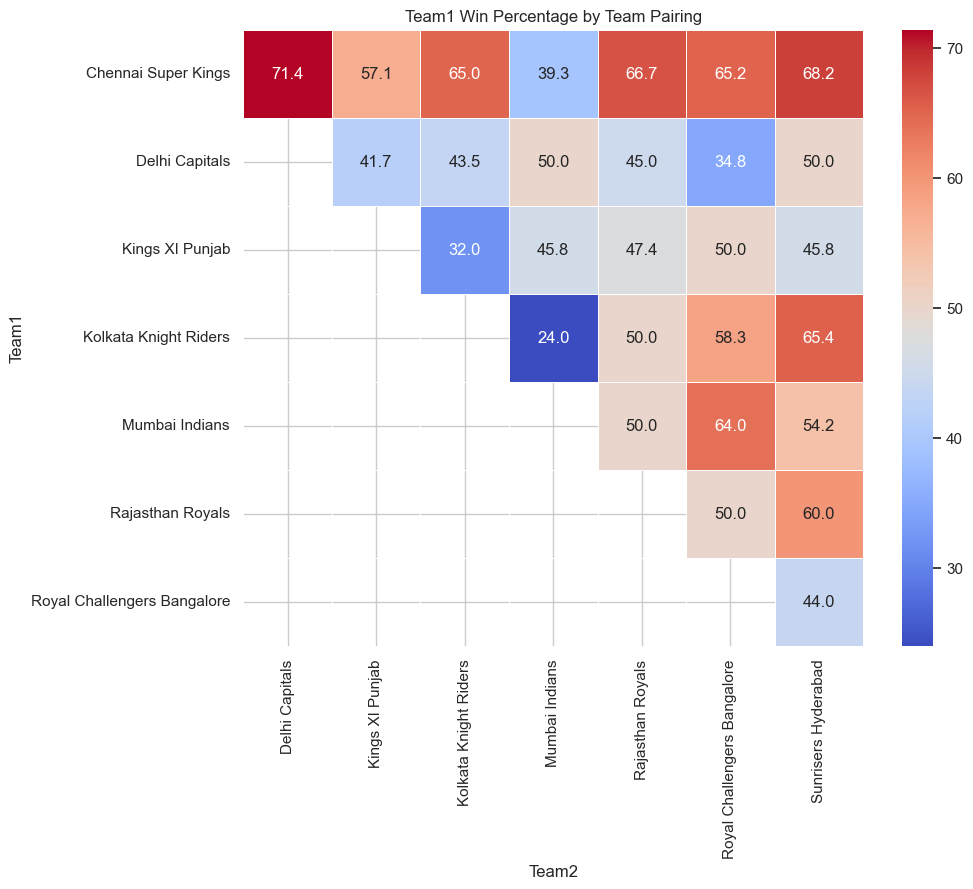

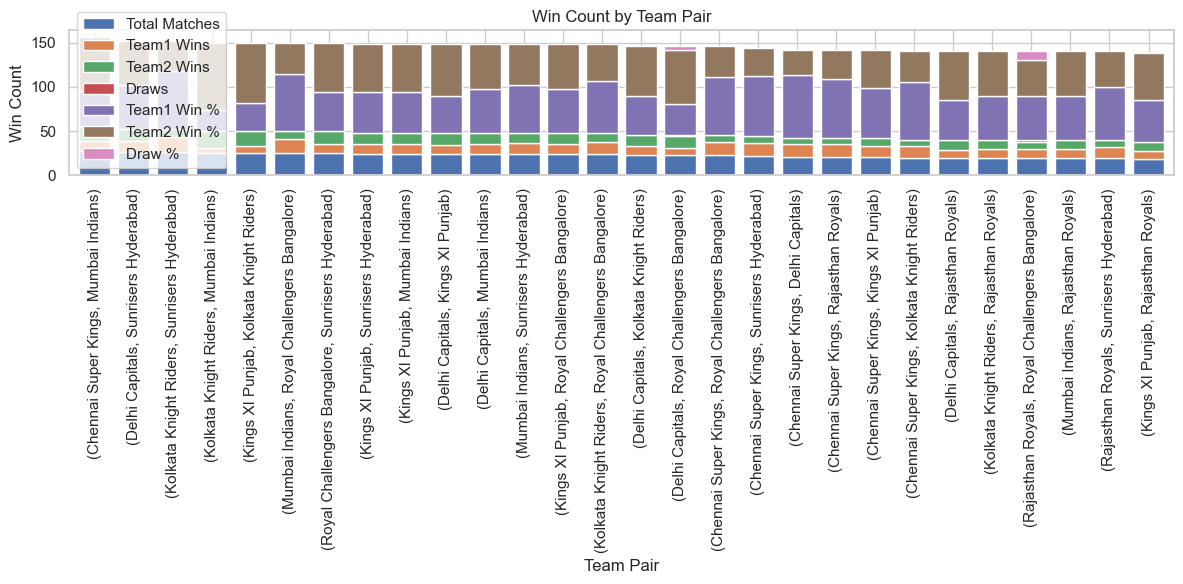

In [563]:


# Set style for plots
sns.set(style="whitegrid")

# Heatmap for Win Percentages
pivot_win_pct = head_to_head.pivot(index='Team1', columns='Team2', values='Team1 Win %')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_win_pct, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title('Team1 Win Percentage by Team Pairing')
plt.show()

# Bar Plot for Total Wins by Team
head_to_head.set_index(['Team1', 'Team2']).plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)
plt.title('Win Count by Team Pair')
plt.xlabel('Team Pair')
plt.ylabel('Win Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




From this analysis, we can know the head to head performance of two teams when they played against each other and we found the win rate of both team against each team .

3.Venue Specific Analysis
 - It  analyze whether the venue has a significant impact on match outcomes,such as home vs. away performance.
 - Compare win rates across various venues.

In [564]:

# Create a mapping of teams to their home venues
home_venues = {
    'Chennai Super Kings': 'M. A. Chidambaram Stadium, Chennai',
    'Delhi Capitals': 'Feroz Shah Kotla Ground, Delhi',
    'Kings XI Punjab': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Kolkata Knight Riders': 'Eden Gardens, Kolkata',
    'Mumbai Indians': 'Wankhede Stadium, Mumbai',
    'Rajasthan Royals': 'Sawai Mansingh Stadium, Jaipur',
    'Royal Challengers Bangalore': 'M. Chinnaswamy Stadium, Bangalore',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Cricket Stadium, Hyderabad'
}

# Standardize the venue names in the home_venues dictionary
home_venues = {team: venue.lower().strip() for team, venue in home_venues.items()}

# Find the unique venues in the dataset
unique_venues = match['venue'].unique()
print("Unique venues in the dataset:")
print(unique_venues)

# Create a mapping from existing venue names to standardized home venue names
venue_mapping = {
    'm. a. chidambaram stadium': 'm. a. chidambaram stadium, chennai',
    'feroz shah kotla': 'feroz shah kotla ground, delhi',
    'is bindra stadium': 'punjab cricket association is bindra stadium, mohali',
    'eden gardens': 'eden gardens, kolkata',
    'wankhede stadium': 'wankhede stadium, mumbai',
    'sawai mansingh stadium': 'sawai mansingh stadium, jaipur',
    'm. chinnaswamy stadium': 'm. chinnaswamy stadium, bangalore',
    'rajiv gandhi intl. cricket stadium': 'rajiv gandhi international cricket stadium, hyderabad'
}

# Standardize the venue names in the dataset
match['venue'] = match['venue'].str.lower().str.strip()

# Update the venue names in the dataset
match['venue'] = match['venue'].replace(venue_mapping)

# Verify the changes
updated_unique_venues = match['venue'].unique()
print("Updated unique venues in the dataset:")
print(updated_unique_venues)

Unique venues in the dataset:
['Rajiv Gandhi International Stadium, Uppal' 'M Chinnaswamy Stadium'
 'Wankhede Stadium' 'Holkar Cricket Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Punjab Cricket Association Stadium, Mohali' 'Sawai Mansingh Stadium'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium' 'M. A. Chidamba

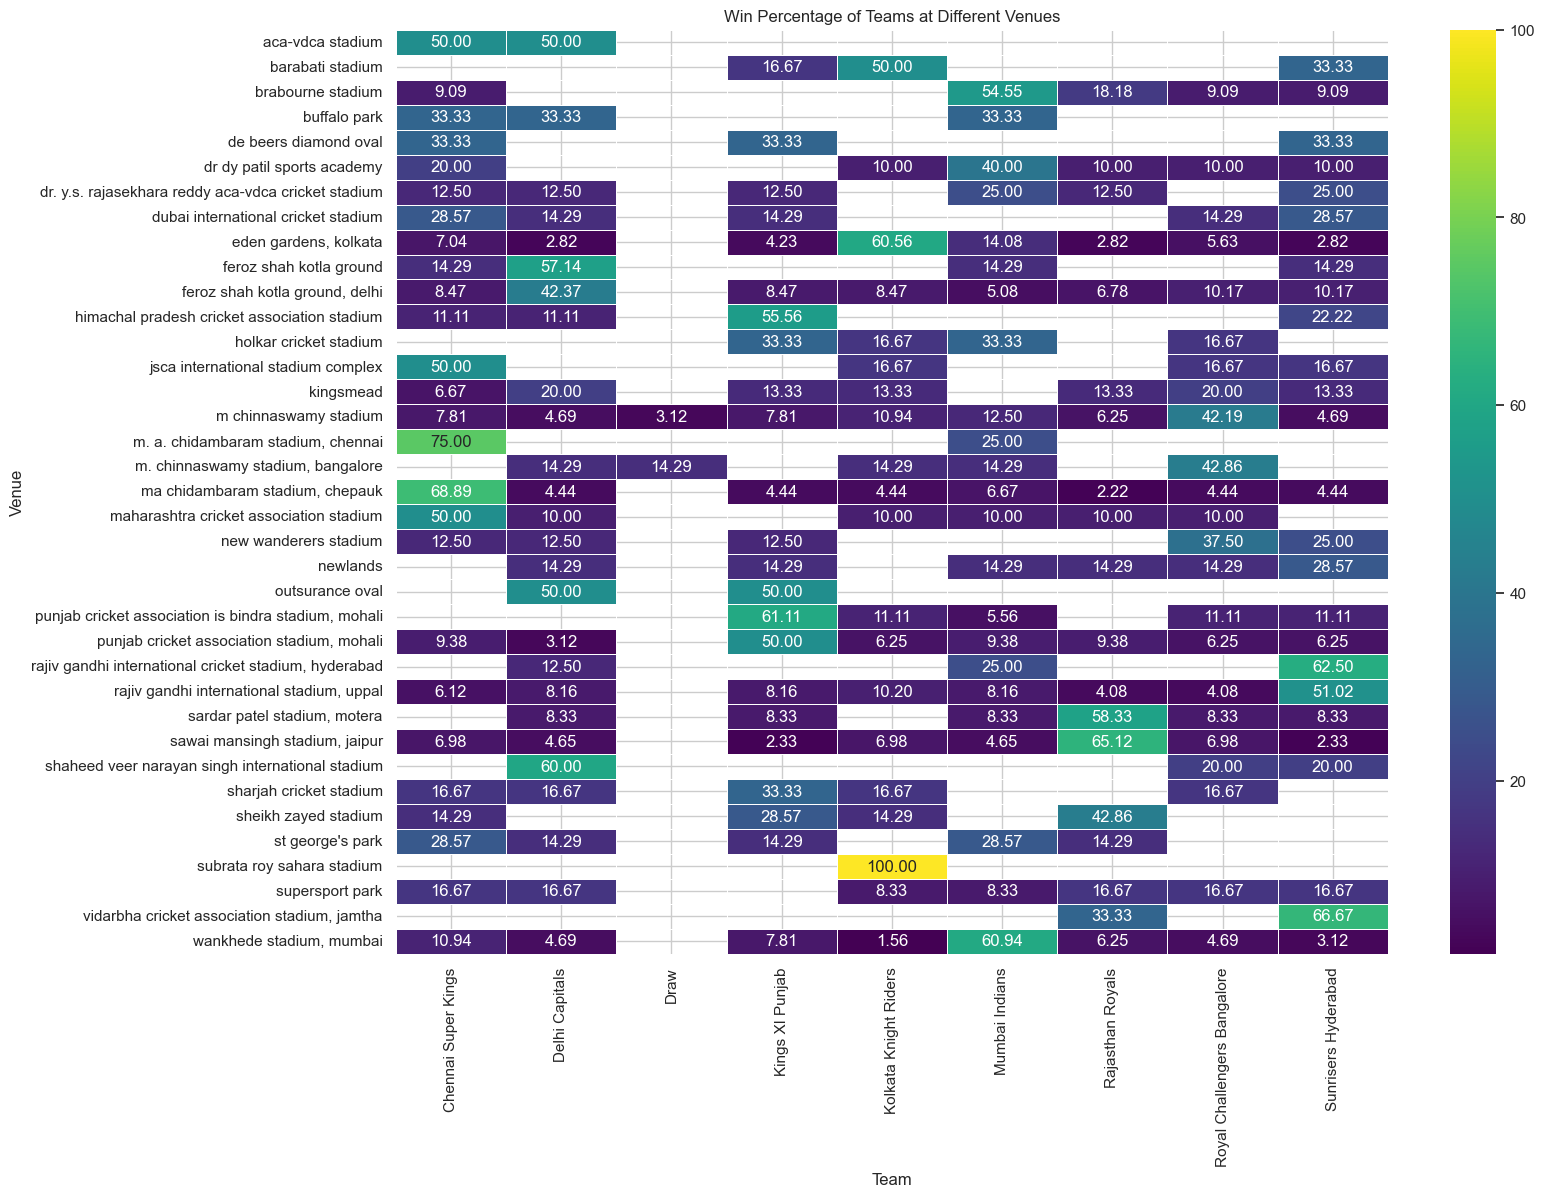

In [565]:

# Clean the venue names by stripping leading/trailing spaces and converting to a consistent case
match['venue'] = match['venue'].str.strip().str.lower()

# Group the data by venue and winner
venue_wins = match.groupby(['venue', 'winner']).size().reset_index(name='wins')

# Calculate total matches played at each venue
total_matches_venue = match.groupby('venue').size().reset_index(name='total_matches')

# Merge the total matches with the venue wins
venue_wins = venue_wins.merge(total_matches_venue, on='venue')

# Calculate win percentage for each team at each venue
venue_wins['win_percentage'] = (venue_wins['wins'] / venue_wins['total_matches']) * 100

# Pivot the data to create a matrix for the heatmap
venue_wins_pivot = venue_wins.pivot_table(index='venue', columns='winner', values='win_percentage')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(venue_wins_pivot, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Win Percentage of Teams at Different Venues')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()

In [566]:
match['venue'].unique()

array(['rajiv gandhi international stadium, uppal',
       'm chinnaswamy stadium', 'wankhede stadium, mumbai',
       'holkar cricket stadium', 'eden gardens, kolkata',
       'feroz shah kotla ground, delhi',
       'punjab cricket association is bindra stadium, mohali',
       'punjab cricket association stadium, mohali',
       'sawai mansingh stadium, jaipur',
       'ma chidambaram stadium, chepauk', 'dr dy patil sports academy',
       'newlands', "st george's park", 'kingsmead', 'supersport park',
       'buffalo park', 'new wanderers stadium', 'de beers diamond oval',
       'outsurance oval', 'brabourne stadium',
       'sardar patel stadium, motera', 'barabati stadium',
       'vidarbha cricket association stadium, jamtha',
       'himachal pradesh cricket association stadium',
       'dr. y.s. rajasekhara reddy aca-vdca cricket stadium',
       'subrata roy sahara stadium',
       'shaheed veer narayan singh international stadium',
       'jsca international stadium complex

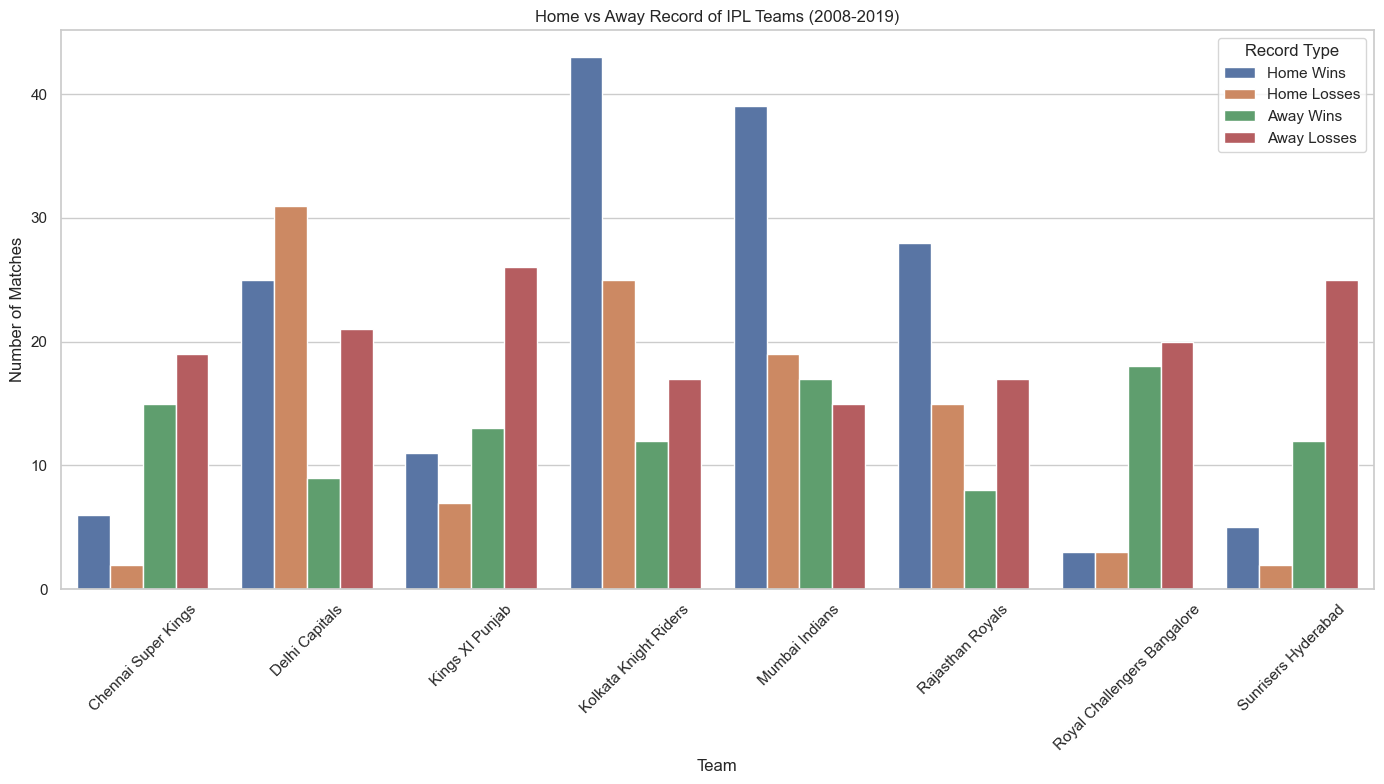

In [567]:

# Create a mapping of teams to their home venues
home_venues = {
    'Chennai Super Kings': 'M. A. Chidambaram Stadium, Chennai',
    'Delhi Capitals': 'Feroz Shah Kotla Ground, Delhi',
    'Kings XI Punjab': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Kolkata Knight Riders': 'Eden Gardens, Kolkata',
    'Mumbai Indians': 'Wankhede Stadium, Mumbai',
    'Rajasthan Royals': 'Sawai Mansingh Stadium, Jaipur',
    'Royal Challengers Bangalore': 'M. Chinnaswamy Stadium, Bangalore',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Cricket Stadium, Hyderabad'
}

# Standardize the venue names in the home_venues dictionary
home_venues = {team: venue.lower().strip() for team, venue in home_venues.items()}

# Standardize the venue names in the dataset
match['venue'] = match['venue'].str.lower().str.strip()

# Initialize dictionaries to store home and away records
home_wins = {team: 0 for team in home_venues.keys()}
away_wins = {team: 0 for team in home_venues.keys()}
home_losses = {team: 0 for team in home_venues.keys()}
away_losses = {team: 0 for team in home_venues.keys()}

# Classify matches as home or away and calculate records
for index, row in match.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']
    venue = row['venue']

    if venue == home_venues.get(team1):
        if winner == team1:
            home_wins[team1] += 1
            away_losses[team2] += 1
        elif winner == team2:
            home_losses[team1] += 1
            away_wins[team2] += 1
    elif venue == home_venues.get(team2):
        if winner == team2:
            home_wins[team2] += 1
            away_losses[team1] += 1
        elif winner == team1:
            home_losses[team2] += 1
            away_wins[team1] += 1

# Create a DataFrame to display the results
home_away_record = pd.DataFrame({
    'Team': home_venues.keys(),
    'Home Wins': home_wins.values(),
    'Home Losses': home_losses.values(),
    'Away Wins': away_wins.values(),
    'Away Losses': away_losses.values()
})

# Melt the DataFrame for easier plotting
home_away_record_melted = home_away_record.melt(id_vars='Team', var_name='Record Type', value_name='Matches')

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Matches', hue='Record Type', data=home_away_record_melted)
plt.title('Home vs Away Record of IPL Teams (2008-2019)')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Record Type')
plt.tight_layout()
plt.show()

3.Team performance in Every Season

   Season                 winner  wins                   team  total_matches  \
0    2008    Chennai Super Kings     9    Chennai Super Kings              9   
1    2008         Delhi Capitals     7         Delhi Capitals              6   
2    2008        Kings XI Punjab    10        Kings XI Punjab              7   
3    2008  Kolkata Knight Riders     6  Kolkata Knight Riders              9   
4    2008         Mumbai Indians     7         Mumbai Indians              6   

  team2  win_percentage  
0     0      100.000000  
1     0      116.666667  
2     0      142.857143  
3     0       66.666667  
4     0      116.666667  
winner  Chennai Super Kings  Delhi Capitals  Kings XI Punjab  \
Season                                                         
2008             100.000000      116.666667       142.857143   
2009              80.000000      142.857143       116.666667   
2010             112.500000      116.666667        50.000000   
2011              88.888889       50.000000

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\1918178606.py:2: SyntaxWarning: invalid escape sequence '\d'
  match['Season'] = match['Season'].astype(str).str.extract('(\d{4})').astype(int)


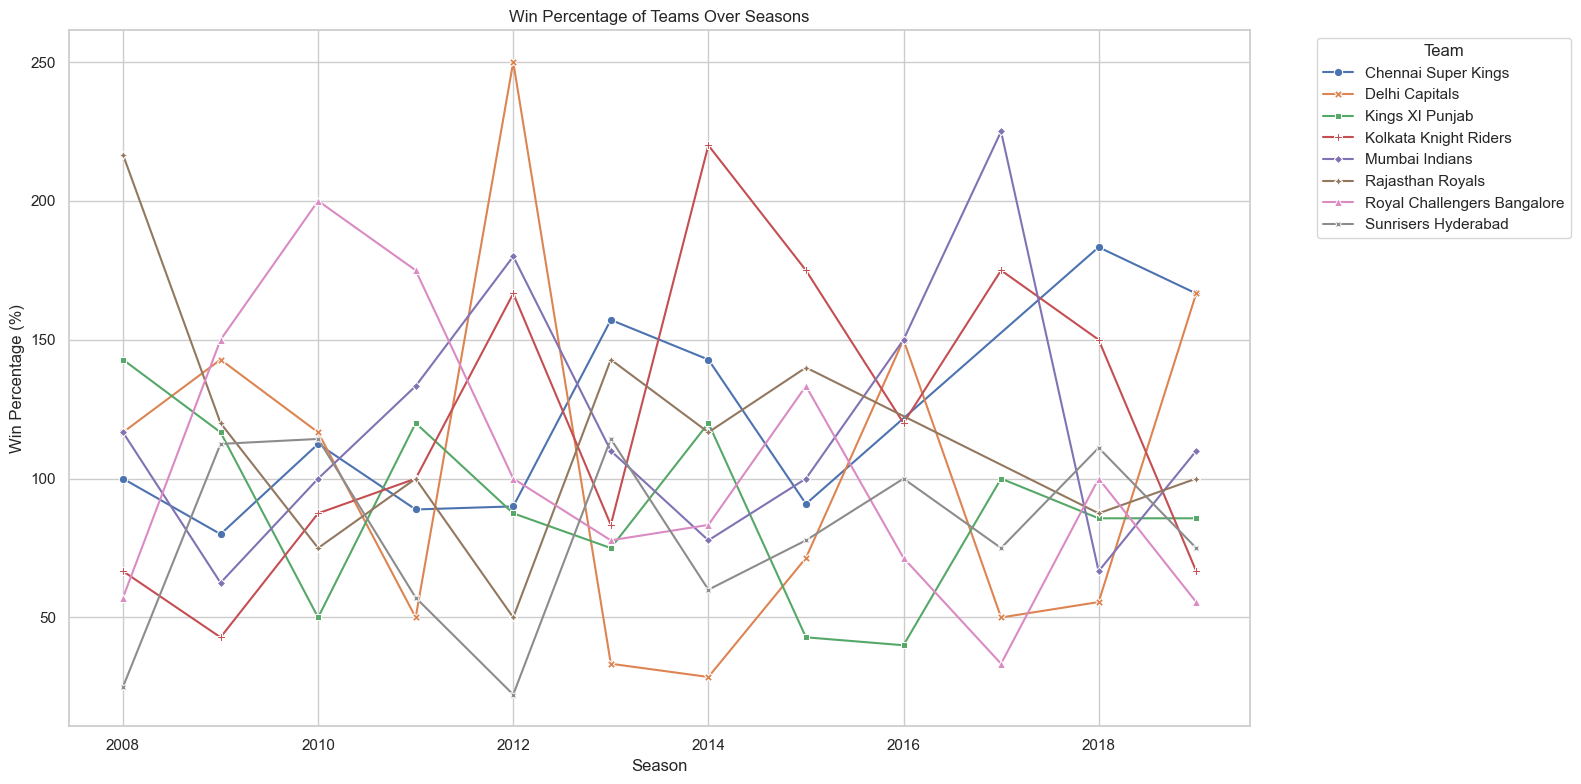

                          Team  Longest Winning Streak  Longest Losing Streak
0          Sunrisers Hyderabad                       6                     11
1  Royal Challengers Bangalore                       5                      7
2        Kolkata Knight Riders                      10                      9
3              Kings XI Punjab                       8                      7
4               Delhi Capitals                       7                     11


<Figure size 1400x800 with 0 Axes>

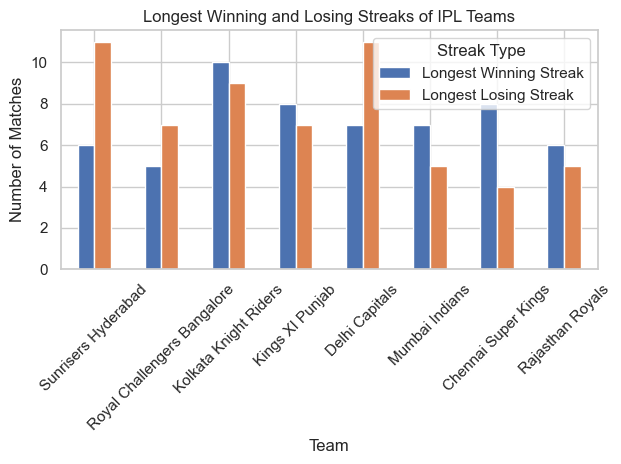

In [568]:


# Convert 'Season' column to string and extract the year
match['Season'] = match['Season'].astype(str).str.extract('(\d{4})').astype(int)

# Standardize the team names
match['team1'] = match['team1'].str.strip()
match['team2'] = match['team2'].str.strip()
match['winner'] = match['winner'].str.strip()

# Calculate the number of wins for each team per season
season_wins = match.groupby(['Season', 'winner']).size().reset_index(name='wins')

# Calculate total matches played by each team per season
team1_matches = match.groupby(['Season', 'team1']).size().reset_index(name='matches')
team2_matches = match.groupby(['Season', 'team2']).size().reset_index(name='matches')
total_matches = pd.concat([team1_matches, team2_matches]).groupby(['Season', 'team1']).sum().reset_index()
total_matches.rename(columns={'team1': 'team', 'matches': 'total_matches'}, inplace=True)

# Merge the total matches with the season wins
season_wins = season_wins.merge(total_matches, left_on=['Season', 'winner'], right_on=['Season', 'team'])

# Calculate win percentage for each team per season
season_wins['win_percentage'] = (season_wins['wins'] / season_wins['total_matches']) * 100

# Check if season_wins is correct
print(season_wins.head())

# Pivot the data to create a matrix for the line plot
season_wins_pivot = season_wins.pivot_table(index='Season', columns='winner', values='win_percentage')

# Check if pivot table is correct
print(season_wins_pivot.head())

# Plot the win percentage trends over the seasons
plt.figure(figsize=(16, 8))
sns.lineplot(data=season_wins_pivot, markers=True, dashes=False)
plt.title('Win Percentage of Teams Over Seasons')
plt.xlabel('Season')
plt.ylabel('Win Percentage (%)')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate winning and losing streaks for each team
streaks = match[['Season', 'team1', 'team2', 'winner']].copy()
streaks['team1_win'] = streaks['team1'] == streaks['winner']
streaks['team2_win'] = streaks['team2'] == streaks['winner']

# Initialize dictionaries to store streaks
winning_streaks = {team: 0 for team in match['team1'].unique()}
losing_streaks = {team: 0 for team in match['team1'].unique()}
current_streak = {team: 0 for team in match['team1'].unique()}

# Calculate streaks
for index, row in streaks.iterrows():
    for team in [row['team1'], row['team2']]:
        if row['winner'] == team:
            if current_streak[team] >= 0:
                current_streak[team] += 1
            else:
                current_streak[team] = 1
            winning_streaks[team] = max(winning_streaks[team], current_streak[team])
        else:
            if current_streak[team] <= 0:
                current_streak[team] -= 1
            else:
                current_streak[team] = -1
            losing_streaks[team] = min(losing_streaks[team], current_streak[team])

# Convert streaks to DataFrame for visualization
streaks_df = pd.DataFrame({
    'Team': winning_streaks.keys(),
    'Longest Winning Streak': winning_streaks.values(),
    'Longest Losing Streak': [-streak for streak in losing_streaks.values()]
})

# Check if streaks_df is correct
print(streaks_df.head())

# Plot the streaks
plt.figure(figsize=(14, 8))
streaks_df.set_index('Team').plot(kind='bar', stacked=False)
plt.title('Longest Winning and Losing Streaks of IPL Teams')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Streak Type')
plt.tight_layout()
plt.show()


In [569]:
match.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue,team_pair
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"rajiv gandhi international stadium, uppal","(Royal Challengers Bangalore, Sunrisers Hydera..."
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,m chinnaswamy stadium,"(Delhi Capitals, Royal Challengers Bangalore)"
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,"wankhede stadium, mumbai","(Kolkata Knight Riders, Mumbai Indians)"
7,8,2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,holkar cricket stadium,"(Kings XI Punjab, Royal Challengers Bangalore)"
9,10,2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,"wankhede stadium, mumbai","(Mumbai Indians, Sunrisers Hyderabad)"


In [570]:
# Ensure 'season' column exists
if 'Season' in match.columns:
    # Find the final match of each season by taking the last match (max ID) for each season
    final_matches = match.loc[match.groupby('Season')['id'].idxmax(), ['Season', 'id', 'team1', 'team2', 'winner']]

    # Display the final matches
    print(final_matches)


     Season     id                  team1                        team2  \
116    2008    117    Chennai Super Kings             Rajasthan Royals   
173    2009    174    Sunrisers Hyderabad  Royal Challengers Bangalore   
233    2010    234    Chennai Super Kings               Mumbai Indians   
306    2011    307    Chennai Super Kings  Royal Challengers Bangalore   
380    2012    381    Chennai Super Kings        Kolkata Knight Riders   
456    2013    457         Mumbai Indians          Chennai Super Kings   
516    2014    517        Kings XI Punjab        Kolkata Knight Riders   
575    2015    576         Mumbai Indians          Chennai Super Kings   
635    2016    636    Sunrisers Hyderabad  Royal Challengers Bangalore   
57     2017     58  Kolkata Knight Riders               Mumbai Indians   
695    2018   7953    Sunrisers Hyderabad          Chennai Super Kings   
755    2019  11415         Mumbai Indians          Chennai Super Kings   

                    winner  
116     

C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\2247601274.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='final_appearances', data=final_stats, palette='viridis')


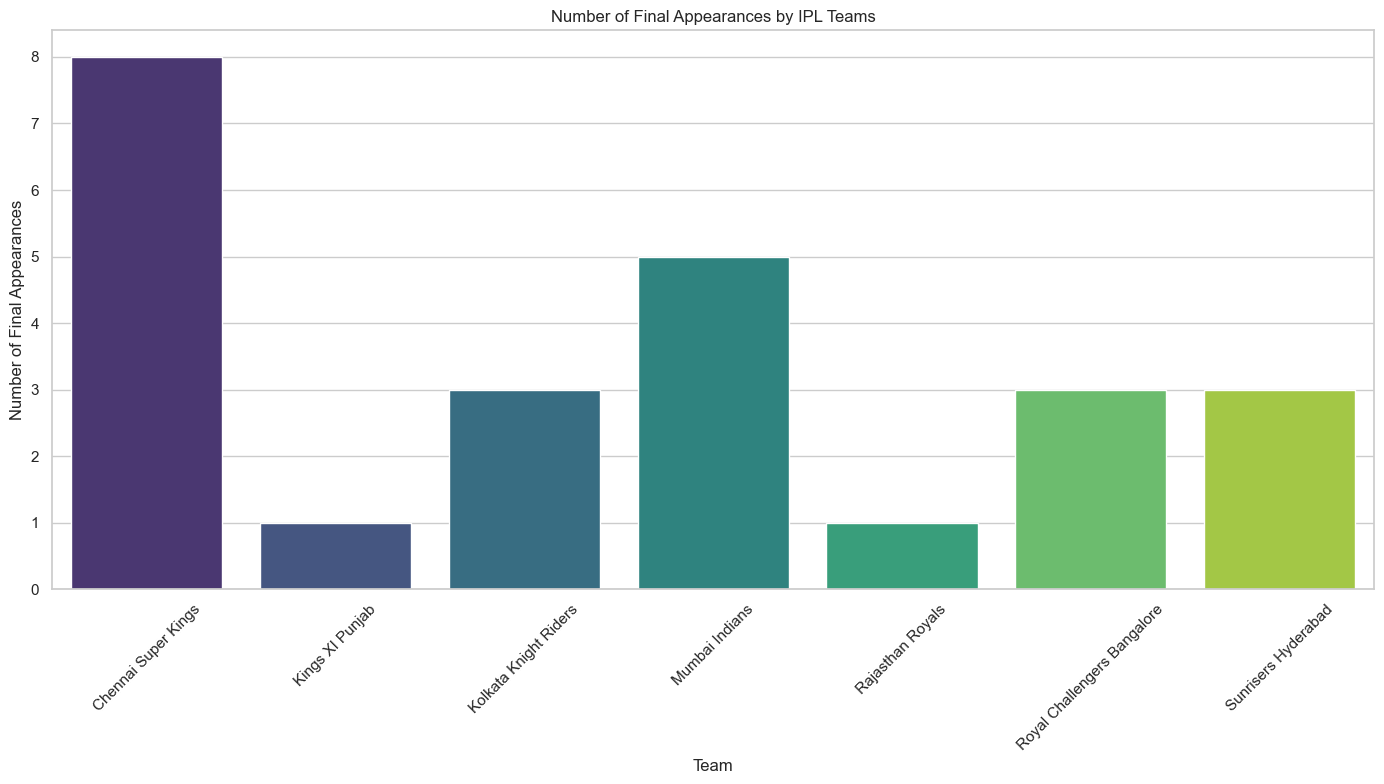

C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\2247601274.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='final_wins', data=final_stats, palette='viridis')


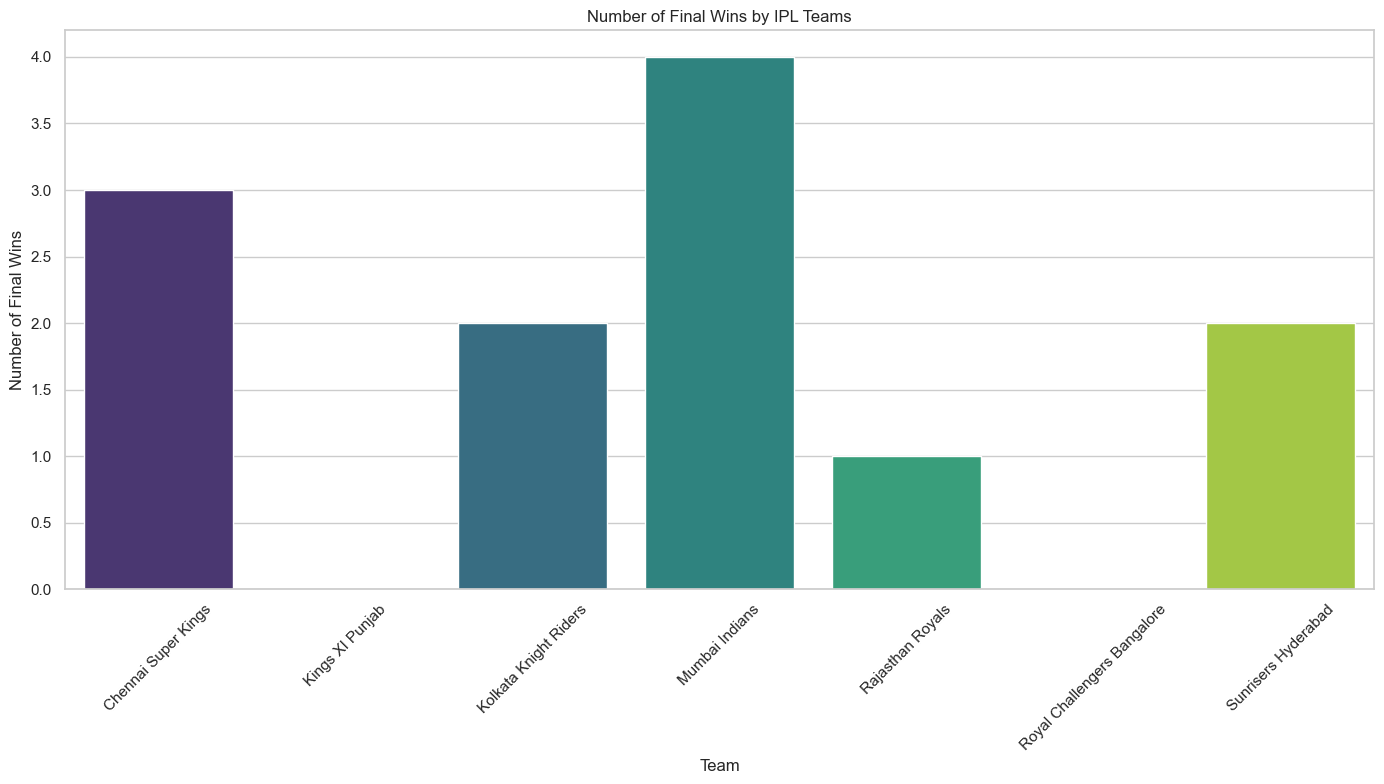

In [571]:
# Calculate the number of times each team has played in the final
final_appearances_team1 = final_matches['team1'].value_counts().reset_index()
final_appearances_team1.columns = ['team', 'final_appearances']
final_appearances_team2 = final_matches['team2'].value_counts().reset_index()
final_appearances_team2.columns = ['team', 'final_appearances']
final_appearances = pd.concat([final_appearances_team1, final_appearances_team2]).groupby('team').sum().reset_index()

# Calculate the number of times each team has won the final
final_wins = final_matches['winner'].value_counts().reset_index()
final_wins.columns = ['team', 'final_wins']

# Merge the final appearances and final wins data
final_stats = final_appearances.merge(final_wins, on='team', how='left').fillna(0)
final_stats['final_wins'] = final_stats['final_wins'].astype(int)

# Plot the number of final appearances for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='final_appearances', data=final_stats, palette='viridis')
plt.title('Number of Final Appearances by IPL Teams')
plt.xlabel('Team')
plt.ylabel('Number of Final Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the number of final wins for each team
plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='final_wins', data=final_stats, palette='viridis')
plt.title('Number of Final Wins by IPL Teams')
plt.xlabel('Team')
plt.ylabel('Number of Final Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.Toss-Related Analysis

Total matches where toss winner also won the match: 329
Total matches where a team won the toss: 641
Win percentage for toss-winning teams: 51.33%


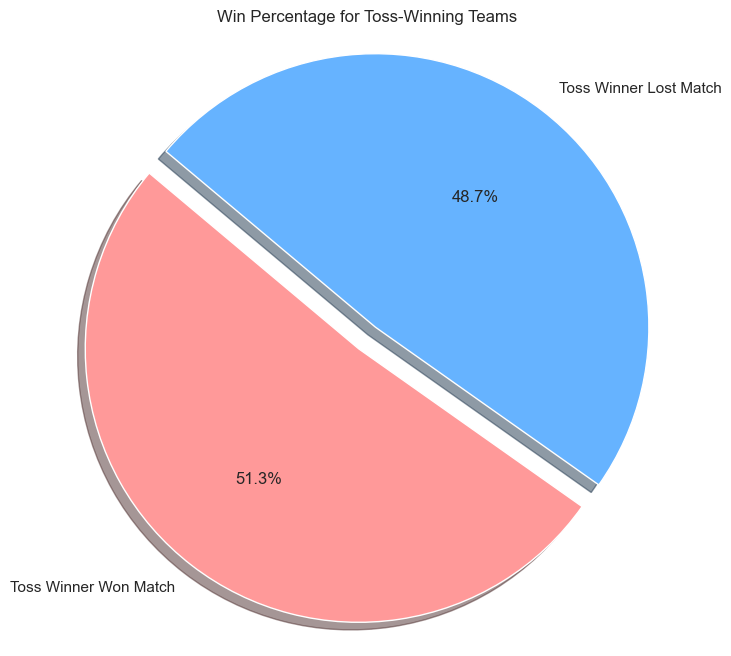

In [572]:
# Calculate the number of matches where the toss winner also won the match
toss_and_match_winner = match[match['toss_winner'] == match['winner']].shape[0]

# Calculate the total number of matches where each team won the toss
total_toss_wins = match['toss_winner'].value_counts().sum()

# Calculate the win percentage for the toss-winning teams
toss_win_percentage = (toss_and_match_winner / total_toss_wins) * 100

# Print the results
print(f"Total matches where toss winner also won the match: {toss_and_match_winner}")
print(f"Total matches where a team won the toss: {total_toss_wins}")
print(f"Win percentage for toss-winning teams: {toss_win_percentage:.2f}%")

# Visualize the results
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
sizes = [toss_and_match_winner, total_toss_wins - toss_and_match_winner]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Win Percentage for Toss-Winning Teams')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Total matches where toss winner chose to bat and won the match: 116
Total matches where toss winner chose to bowl and won the match: 213
Total matches where toss winner chose to bat: 251
Total matches where toss winner chose to bowl: 390
Win percentage for toss winners who chose to bat: 46.22%
Win percentage for toss winners who chose to bowl: 54.62%


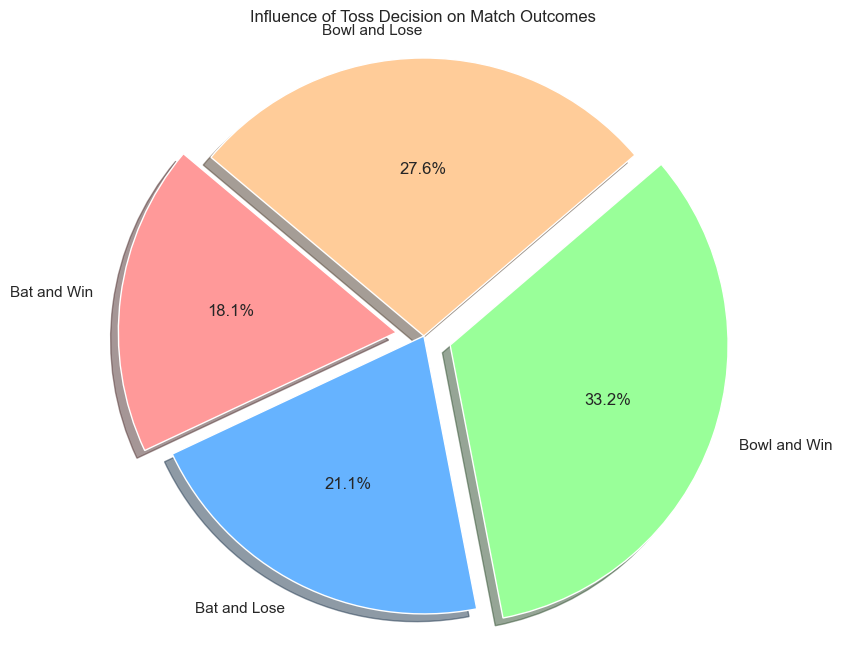

In [573]:
# Calculate the number of matches where the toss winner chose to bat and won the match
bat_and_win = match[(match['toss_decision'] == 'bat') & (match['toss_winner'] == match['winner'])].shape[0]

# Calculate the number of matches where the toss winner chose to bowl and won the match
bowl_and_win = match[(match['toss_decision'] == 'field') & (match['toss_winner'] == match['winner'])].shape[0]

# Calculate the total number of matches where the toss winner chose to bat or bowl
total_bat = match[match['toss_decision'] == 'bat'].shape[0]
total_bowl = match[match['toss_decision'] == 'field'].shape[0]

# Calculate the win percentage for each toss decision
bat_win_percentage = (bat_and_win / total_bat) * 100 if total_bat > 0 else 0
bowl_win_percentage = (bowl_and_win / total_bowl) * 100 if total_bowl > 0 else 0

# Print the results
print(f"Total matches where toss winner chose to bat and won the match: {bat_and_win}")
print(f"Total matches where toss winner chose to bowl and won the match: {bowl_and_win}")
print(f"Total matches where toss winner chose to bat: {total_bat}")
print(f"Total matches where toss winner chose to bowl: {total_bowl}")
print(f"Win percentage for toss winners who chose to bat: {bat_win_percentage:.2f}%")
print(f"Win percentage for toss winners who chose to bowl: {bowl_win_percentage:.2f}%")

# Visualize the results
labels = ['Bat and Win', 'Bat and Lose', 'Bowl and Win', 'Bowl and Lose']
sizes = [bat_and_win, total_bat - bat_and_win, bowl_and_win, total_bowl - bowl_and_win]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0.1, 0)  # explode the 1st and 3rd slices

plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Influence of Toss Decision on Match Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [574]:
# Calculate the number of times each team won the toss
toss_wins = match['toss_winner'].value_counts().reset_index()
toss_wins.columns = ['team', 'toss_wins']

# Calculate the number of times each team won the match after winning the toss
toss_and_match_wins = match[match['toss_winner'] == match['winner']]['toss_winner'].value_counts().reset_index()
toss_and_match_wins.columns = ['team', 'toss_and_match_wins']

# Merge the toss wins and toss-and-match wins data
toss_stats = toss_wins.merge(toss_and_match_wins, on='team', how='left').fillna(0)
toss_stats['toss_and_match_wins'] = toss_stats['toss_and_match_wins'].astype(int)

# Calculate the win percentage for each team after winning the toss
toss_stats['win_percentage_after_toss'] = (toss_stats['toss_and_match_wins'] / toss_stats['toss_wins']) * 100

# Print the results
print(toss_stats)




                          team  toss_wins  toss_and_match_wins  \
0               Mumbai Indians         89                   51   
1          Chennai Super Kings         86                   55   
2        Kolkata Knight Riders         82                   46   
3               Delhi Capitals         81                   36   
4          Sunrisers Hyderabad         78                   33   
5             Rajasthan Royals         76                   39   
6  Royal Challengers Bangalore         75                   38   
7              Kings XI Punjab         74                   31   

   win_percentage_after_toss  
0                  57.303371  
1                  63.953488  
2                  56.097561  
3                  44.444444  
4                  42.307692  
5                  51.315789  
6                  50.666667  
7                  41.891892  


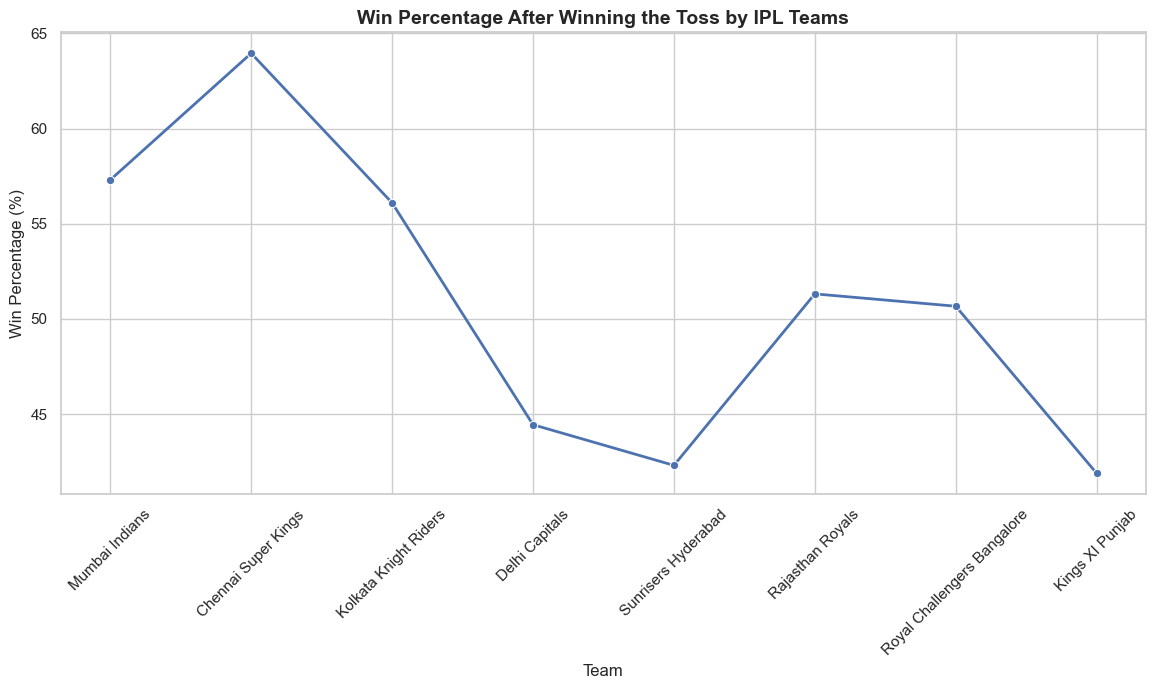

In [575]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='team', y='win_percentage_after_toss', data=toss_stats, marker='o', color='b', linewidth=2)
plt.xticks(rotation=45)
plt.title('Win Percentage After Winning the Toss by IPL Teams', fontsize=14, fontweight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Percentage (%)', fontsize=12)
plt.grid(True)
plt.show()


5.Playoff Matches Analysis (Eliminator)

     Season     id                team1                team2  \
752    2019  11412  Chennai Super Kings       Mumbai Indians   
753    2019  11413  Sunrisers Hyderabad       Delhi Capitals   
754    2019  11414       Delhi Capitals  Chennai Super Kings   
755    2019  11415       Mumbai Indians  Chennai Super Kings   

                  winner  
752       Mumbai Indians  
753       Delhi Capitals  
754  Chennai Super Kings  
755       Mumbai Indians  


C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\820636832.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='playoff_appearances', data=playoff_stats, palette='viridis')


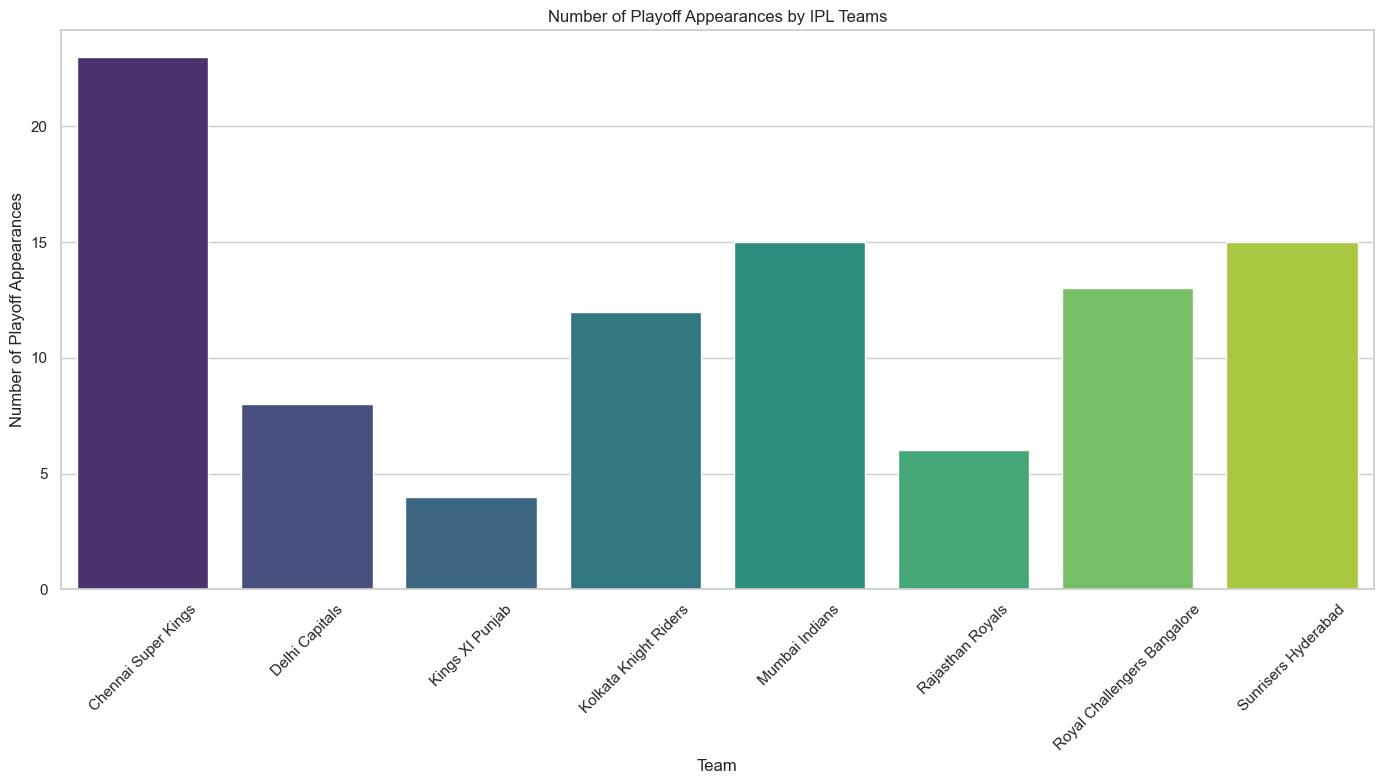

C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\820636832.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='playoff_wins', data=playoff_stats, palette='viridis')


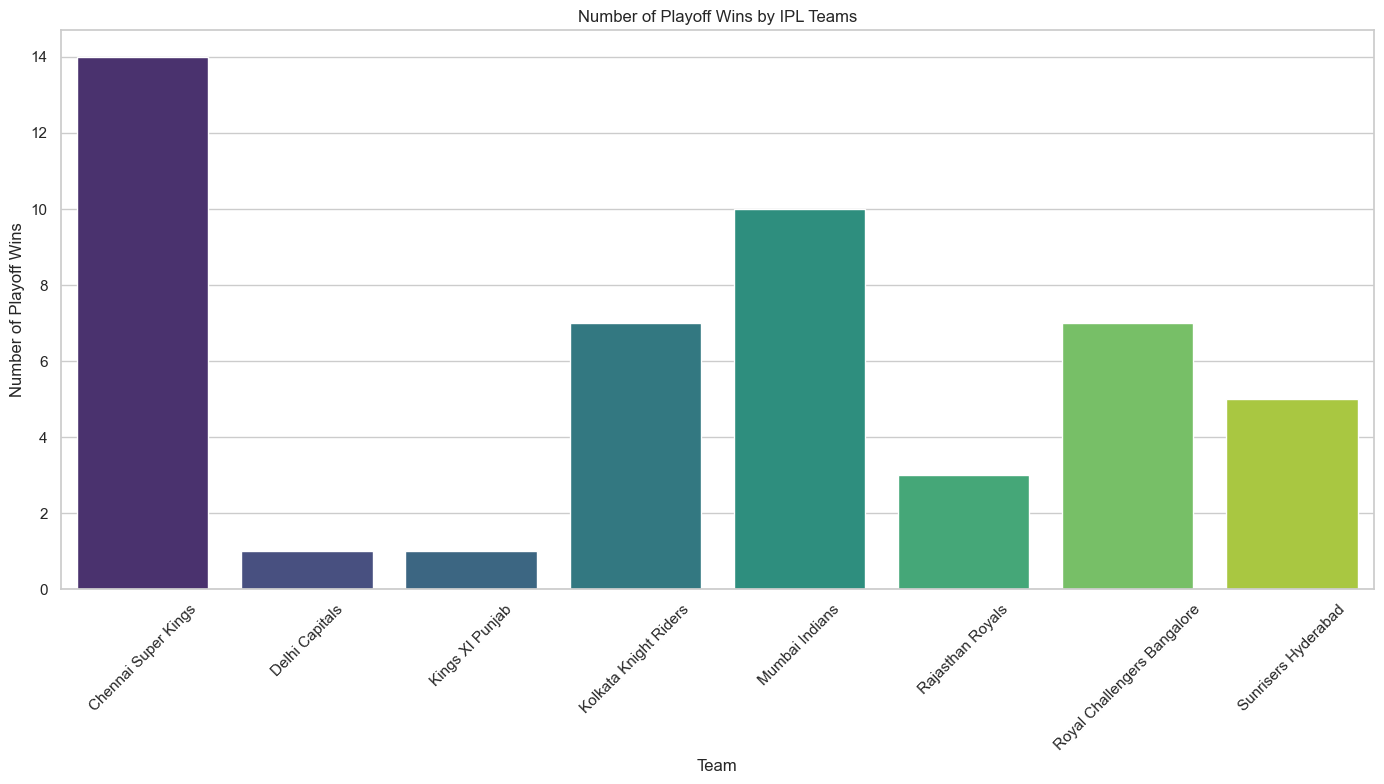

In [576]:
if 'Season' in match.columns:
    # Sort by season and match ID to get the correct order of matches
    match_sorted = match.sort_values(by=['Season', 'id'])

    # Select the last 4 matches of each season (playoff matches)
    playoff_matches = match_sorted.groupby('Season').tail(4)[['Season', 'id', 'team1', 'team2', 'winner']]

    # Display the playoff matches
    print(playoff_matches.tail(4))

    # Calculate the number of times each team has played in the playoffs
    playoff_appearances_team1 = playoff_matches['team1'].value_counts().reset_index()
    playoff_appearances_team1.columns = ['team', 'playoff_appearances']
    playoff_appearances_team2 = playoff_matches['team2'].value_counts().reset_index()
    playoff_appearances_team2.columns = ['team', 'playoff_appearances']
    playoff_appearances = pd.concat([playoff_appearances_team1, playoff_appearances_team2]).groupby('team').sum().reset_index()

    # Calculate the number of times each team has won a playoff match
    playoff_wins = playoff_matches['winner'].value_counts().reset_index()
    playoff_wins.columns = ['team', 'playoff_wins']


    

    
    # Merge the playoff appearances and playoff wins data
    playoff_stats = playoff_appearances.merge(playoff_wins, on='team', how='left').fillna(0)
    playoff_stats['playoff_wins'] = playoff_stats['playoff_wins'].astype(int)

    # Plot the number of playoff appearances for each team
    plt.figure(figsize=(14, 8))
    sns.barplot(x='team', y='playoff_appearances', data=playoff_stats, palette='viridis')
    plt.title('Number of Playoff Appearances by IPL Teams')
    plt.xlabel('Team')
    plt.ylabel('Number of Playoff Appearances')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot the number of playoff wins for each team
    plt.figure(figsize=(14, 8))
    sns.barplot(x='team', y='playoff_wins', data=playoff_stats, palette='viridis')
    plt.title('Number of Playoff Wins by IPL Teams')
    plt.xlabel('Team')
    plt.ylabel('Number of Playoff Wins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Season' column is missing in the dataset.")


C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\1613100912.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='playoff_win_percentage', data=combined_stats, palette='viridis')


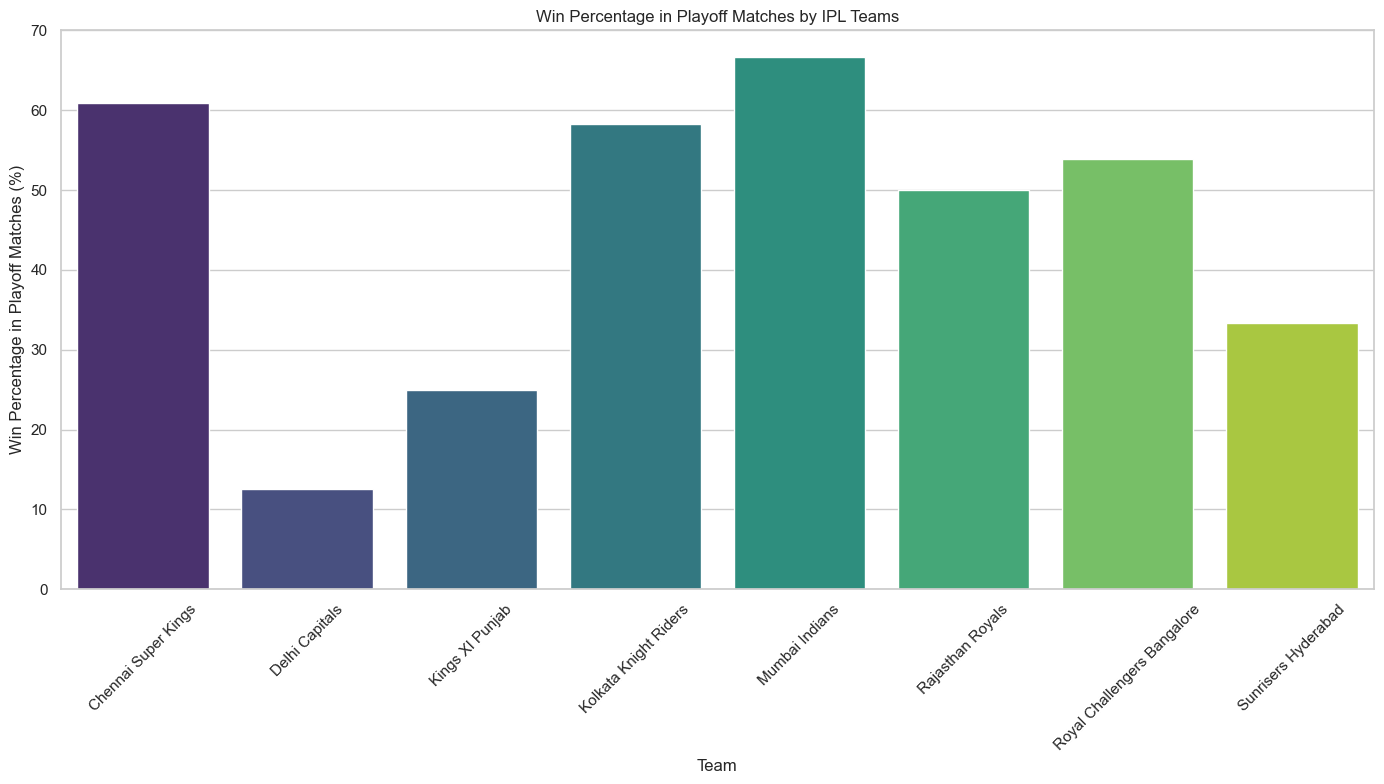

C:\Users\ACER\AppData\Local\Temp\ipykernel_99772\1613100912.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='normal_win_percentage', data=combined_stats, palette='viridis')


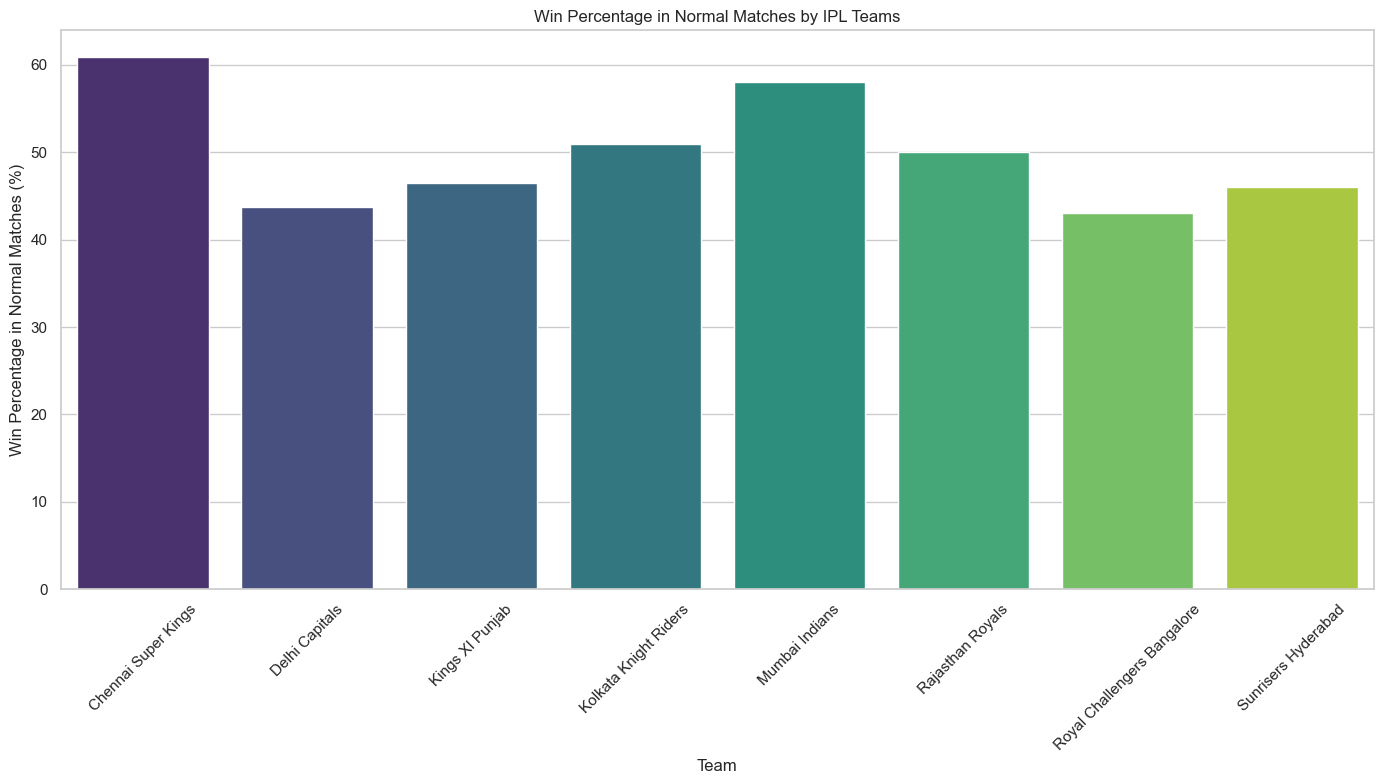

In [577]:
 # Identify normal matches (excluding playoff matches)
 normal_matches = match_sorted[~match_sorted.index.isin(playoff_matches.index)]


 # Calculate the number of wins for each team in normal matches
 normal_wins = normal_matches['winner'].value_counts().reset_index()
 normal_wins.columns = ['team', 'normal_wins']



 # Calculate the total number of normal matches each team played
 normal_appearances_team1 = normal_matches['team1'].value_counts().reset_index()
 normal_appearances_team1.columns = ['team', 'normal_appearances']
 normal_appearances_team2 = normal_matches['team2'].value_counts().reset_index()
 normal_appearances_team2.columns = ['team', 'normal_appearances']
 normal_appearances = pd.concat([normal_appearances_team1, normal_appearances_team2]).groupby('team').sum().reset_index()

 # Merge the playoff appearances and playoff wins data
 playoff_stats = playoff_appearances.merge(playoff_wins, on='team', how='left').fillna(0)
 playoff_stats['playoff_wins'] = playoff_stats['playoff_wins'].astype(int)
 playoff_stats['playoff_win_percentage'] = (playoff_stats['playoff_wins'] / playoff_stats['playoff_appearances']) * 100

 # Merge the normal appearances and normal wins data
 normal_stats = normal_appearances.merge(normal_wins, on='team', how='left').fillna(0)
 normal_stats['normal_wins'] = normal_stats['normal_wins'].astype(int)
 normal_stats['normal_win_percentage'] = (normal_stats['normal_wins'] / normal_stats['normal_appearances']) * 100

 # Combine playoff and normal stats
 combined_stats = playoff_stats.merge(normal_stats, on='team', how='outer').fillna(0)

 # Plot the win percentage in playoff matches for each team
 plt.figure(figsize=(14, 8))
 sns.barplot(x='team', y='playoff_win_percentage', data=combined_stats, palette='viridis')
 plt.title('Win Percentage in Playoff Matches by IPL Teams')
 plt.xlabel('Team')
 plt.ylabel('Win Percentage in Playoff Matches (%)')
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

 # Plot the win percentage in normal matches for each team
 plt.figure(figsize=(14, 8))
 sns.barplot(x='team', y='normal_win_percentage', data=combined_stats, palette='viridis')
 plt.title('Win Percentage in Normal Matches by IPL Teams')
 plt.xlabel('Team')
 plt.ylabel('Win Percentage in Normal Matches (%)')
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

Outlier Handling

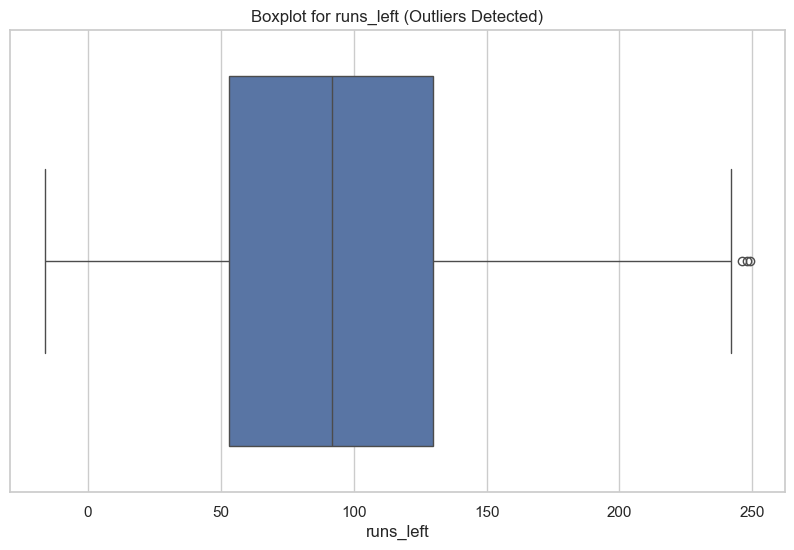

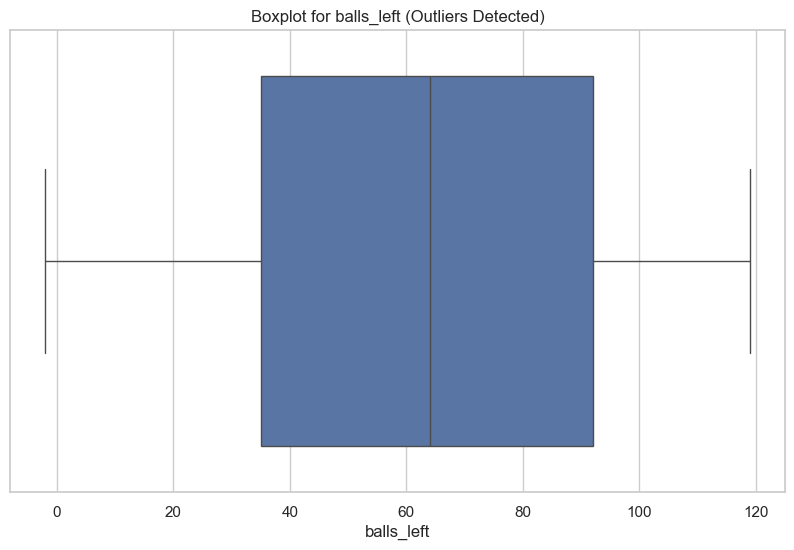

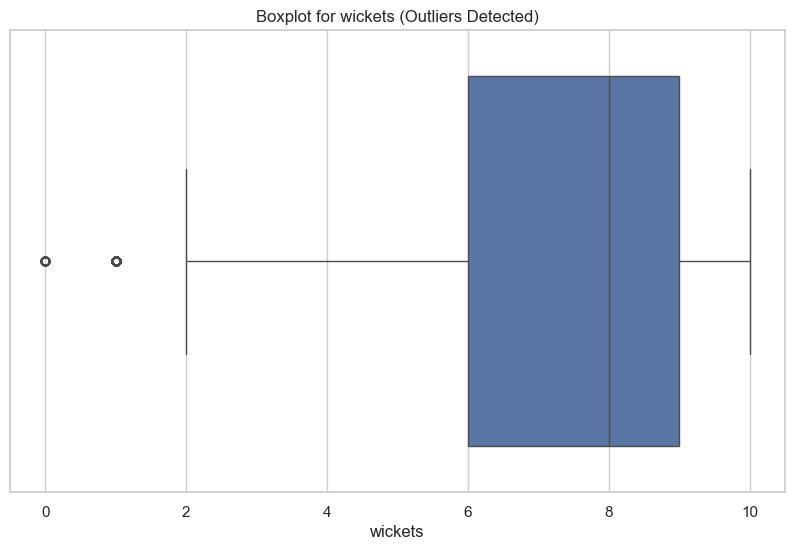

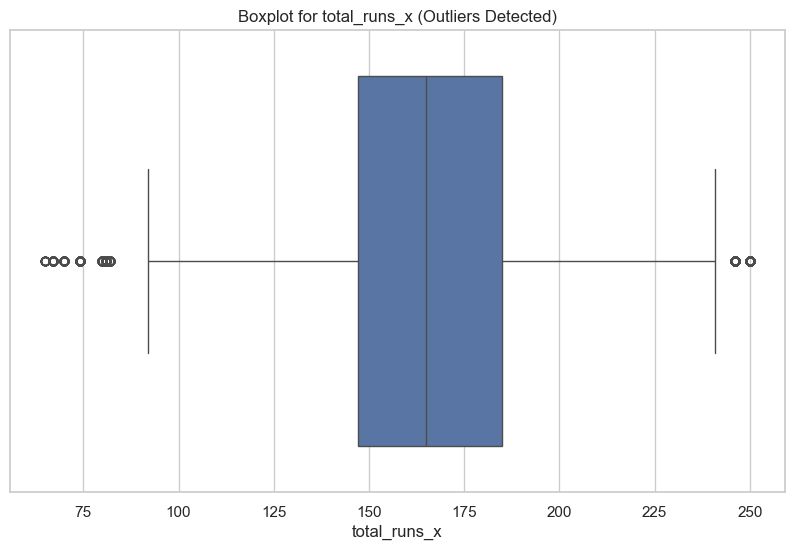

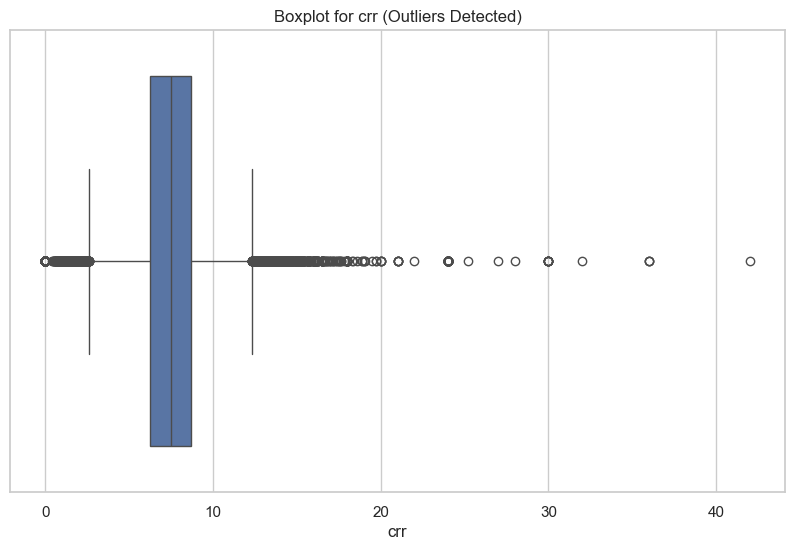

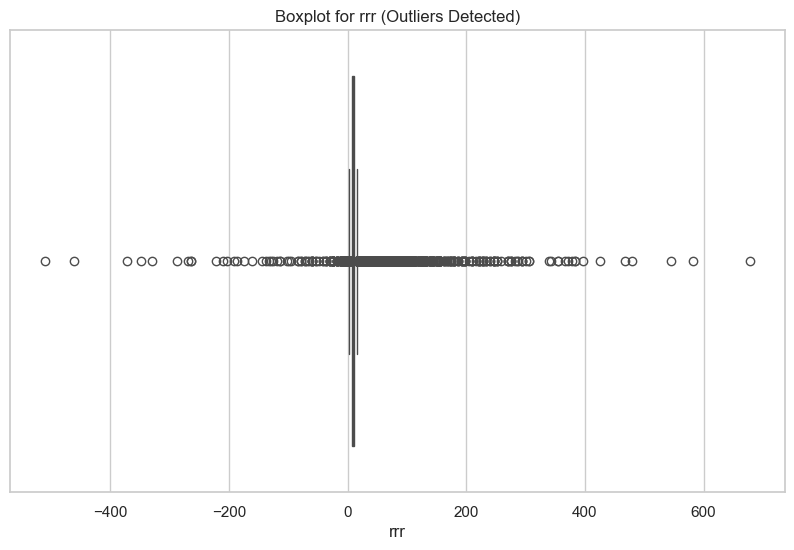

Outliers in 'runs_left': 3 detected
Outliers in 'balls_left': 0 detected
Outliers in 'wickets': 772 detected
Outliers in 'total_runs_x': 805 detected
Outliers in 'crr': 3114 detected
Outliers in 'rrr': 6213 detected


In [578]:


# List of numerical columns to check for outliers
numerical_columns = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

# Create a dictionary to store outliers
outliers_dict = {}

# Loop through each numerical column and check for outliers using IQR method
for column in numerical_columns:
    Q1 = final_df[column].quantile(0.25)
    Q3 = final_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = final_df[(final_df[column] < lower_bound) | (final_df[column] > upper_bound)]
    
    # Store outliers count for each column
    outliers_dict[column] = len(outliers)

    # Visualize the outliers using boxplots
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=final_df[column])
    plt.title(f'Boxplot for {column} (Outliers Detected)')
    plt.show()

# Display the number of outliers in each column
for column, count in outliers_dict.items():
    print(f"Outliers in '{column}': {count} detected")


In [579]:
# Handle outliers in 'runs_left'
Q1_runs_left = final_df['runs_left'].quantile(0.25)
Q3_runs_left = final_df['runs_left'].quantile(0.75)
IQR_runs_left = Q3_runs_left - Q1_runs_left
lower_bound_runs_left = Q1_runs_left - 1.5 * IQR_runs_left
upper_bound_runs_left = Q3_runs_left + 1.5 * IQR_runs_left
final_df['runs_left'] = final_df['runs_left'].clip(lower=lower_bound_runs_left, upper=upper_bound_runs_left)

# Handle outliers in 'wickets' by removing outliers (if necessary)
Q1_wickets = final_df['wickets'].quantile(0.25)
Q3_wickets = final_df['wickets'].quantile(0.75)
IQR_wickets = Q3_wickets - Q1_wickets
lower_bound_wickets = Q1_wickets - 1.5 * IQR_wickets
upper_bound_wickets = Q3_wickets + 1.5 * IQR_wickets
final_df = final_df[(final_df['wickets'] >= lower_bound_wickets) & (final_df['wickets'] <= upper_bound_wickets)]

# Handle outliers in 'total_runs_x' by removing outliers (if necessary)
Q1_total_runs = final_df['total_runs_x'].quantile(0.25)
Q3_total_runs = final_df['total_runs_x'].quantile(0.75)
IQR_total_runs = Q3_total_runs - Q1_total_runs
lower_bound_total_runs = Q1_total_runs - 1.5 * IQR_total_runs
upper_bound_total_runs = Q3_total_runs + 1.5 * IQR_total_runs
final_df = final_df[(final_df['total_runs_x'] >= lower_bound_total_runs) & (final_df['total_runs_x'] <= upper_bound_total_runs)]

# Handle outliers in 'crr' by capping (clipping) extreme values
Q1_crr = final_df['crr'].quantile(0.25)
Q3_crr = final_df['crr'].quantile(0.75)
IQR_crr = Q3_crr - Q1_crr
lower_bound_crr = Q1_crr - 1.5 * IQR_crr
upper_bound_crr = Q3_crr + 1.5 * IQR_crr
final_df['crr'] = final_df['crr'].clip(lower=lower_bound_crr, upper=upper_bound_crr)

# Handle outliers in 'rrr' by capping (clipping) extreme values
Q1_rrr = final_df['rrr'].quantile(0.25)
Q3_rrr = final_df['rrr'].quantile(0.75)
IQR_rrr = Q3_rrr - Q1_rrr
lower_bound_rrr = Q1_rrr - 1.5 * IQR_rrr
upper_bound_rrr = Q3_rrr + 1.5 * IQR_rrr
final_df['rrr'] = final_df['rrr'].clip(lower=lower_bound_rrr, upper=upper_bound_rrr)



In [580]:
# Checking the final dataset
print(final_df.describe())


          runs_left    balls_left       wickets  total_runs_x           crr  \
count  69765.000000  69765.000000  69765.000000  69765.000000  69765.000000   
mean      93.262037     63.301641      7.617588    166.043245      7.462902   
std       49.727168     33.011732      2.020807     27.909642      1.990905   
min      -16.000000     -2.000000      2.000000     92.000000      2.700000   
25%       54.000000     35.000000      6.000000    147.000000      6.300000   
50%       93.000000     64.000000      8.000000    165.000000      7.500000   
75%      130.000000     92.000000      9.000000    185.000000      8.700000   
max      241.000000    119.000000     10.000000    241.000000     12.300000   

                rrr        result  
count  69765.000000  69765.000000  
mean       9.171924      0.460345  
std        3.278360      0.498429  
min        1.734783      0.000000  
25%        7.173913      0.000000  
50%        8.861538      0.000000  
75%       10.800000      1.000000  


In [581]:
# Handle negative values in 'runs_left' and 'balls_left' (set negative values to 0 or drop)
final_df['runs_left'] = final_df['runs_left'].apply(lambda x: max(x, 0))
final_df['balls_left'] = final_df['balls_left'].apply(lambda x: max(x, 0))

# Recheck for outliers and handle outliers using IQR method (for capping or removal)
# For 'crr' and 'rrr', we can apply clipping again:
final_df['crr'] = final_df['crr'].clip(lower=lower_bound_crr, upper=upper_bound_crr)
final_df['rrr'] = final_df['rrr'].clip(lower=lower_bound_rrr, upper=upper_bound_rrr)

In [582]:
# Checking the final dataset
print(final_df.describe())


          runs_left    balls_left       wickets  total_runs_x           crr  \
count  69765.000000  69765.000000  69765.000000  69765.000000  69765.000000   
mean      93.277603     63.302401      7.617588    166.043245      7.462902   
std       49.697229     33.010261      2.020807     27.909642      1.990905   
min        0.000000      0.000000      2.000000     92.000000      2.700000   
25%       54.000000     35.000000      6.000000    147.000000      6.300000   
50%       93.000000     64.000000      8.000000    165.000000      7.500000   
75%      130.000000     92.000000      9.000000    185.000000      8.700000   
max      241.000000    119.000000     10.000000    241.000000     12.300000   

                rrr        result  
count  69765.000000  69765.000000  
mean       9.171924      0.460345  
std        3.278360      0.498429  
min        1.734783      0.000000  
25%        7.173913      0.000000  
50%        8.861538      0.000000  
75%       10.800000      1.000000  


                                                                        TRAINING THE MODEL                                                                                        

In [583]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Splitting the dataset
X = final_df.iloc[:,:-1]  # Features
y = final_df.iloc[:,-1]   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Identify categorical columns and encode them
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays to DataFrames with column names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoded_feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoded_feature_names)

# 3. Drop original categorical columns and concatenate encoded features
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# 4. Standardize the features (Important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# 6. Evaluate Train Accuracy
y_train_pred = log_reg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"=== Train Accuracy ===\nTrain Accuracy: {train_accuracy * 100:.2f}%\n")


=== Train Accuracy ===
Train Accuracy: 84.09%



In [584]:
# Predict on the test set
y_test_pred = log_reg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"=== Test Accuracy ===\nTest Accuracy: {test_accuracy * 100:.2f}%\n")

=== Test Accuracy ===
Test Accuracy: 84.07%



In [585]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, F1-score
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the metrics
print(f"=== Model Evaluation ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")


=== Model Evaluation ===
Accuracy: 84.07%
Precision (Weighted): 0.84
Recall (Weighted): 0.84
F1 Score (Weighted): 0.84


In [586]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[6307 1223]
 [1000 5423]]


In [587]:
from sklearn.metrics import classification_report

# Print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7530
           1       0.82      0.84      0.83      6423

    accuracy                           0.84     13953
   macro avg       0.84      0.84      0.84     13953
weighted avg       0.84      0.84      0.84     13953



                                                                         CONCLUSION                                                                                           

 All the analysis and prediction is done on the basis of data . Using the datasets matches.csv and deliveries.csv , the model is successfully predicting the outcome of matches. The model has train accuracy 84.09% and test accuracy 84.07% which mean model is trained well and predicting well.The model achieves an F1 score of 0.84, indicating a well-balanced performance between precision and recall. This suggests that the model is effectively identifying relevant instances while minimizing false positives and false negatives.


 While the results are promising, there is room for further enhancement. Future steps include exploring additional feature engineering, optimizing hyperparameters, and potentially experimenting with different machine learning algorithms. Additionally, techniques like class balancing and ensemble methods could further improve the model's accuracy and robustness. With these adjustments, the model’s predictive power can be strengthened for even more reliable outcomes


